<h3> Visaulization of Bitcoin price rally in 2021 </h3>
This project will display Bitcoin price history from 2015 to 2021 with the highlighting of the price rally during 2021

<h4>Dependency list:</h4>
<ul>
    <li>forex-python</li>
    <li>pandas</li>
    <li>matplotlib</li>
    <li>datetime</li>
</ul>

<h4>AQUIRINGING DATA</h4>
Downloading bitcoin price history from coinbase API by using forex-python package https://forex-python.readthedocs.io/en/latest/index.html

In [28]:
from forex_python.bitcoin import BtcConverter
b = BtcConverter ()

In [29]:
from datetime import datetime

#download bitcoin daily price history in USD from start date to end date and save it in a dictionary
start = datetime(2015,1,1)
end = datetime(2021,12,31)
price_data = b.get_previous_price_list("USD", start, end)

<h4>DATA MANIPULATION</h4>

In [30]:
#convert data to a pandas dataframe
import pandas as pd

prices = pd.DataFrame(price_data.items(), columns=["date", "price"])

In [31]:
#set date column as the dataframe index for easy data manipulation
prices = prices.set_index('date')

<h4>VISUALIZING AND PLOTTING DATA</h4>

<AxesSubplot:xlabel='date'>

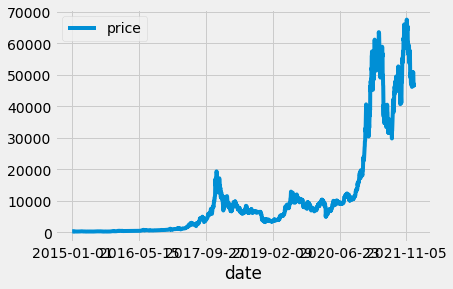

In [32]:
#platting data with pandas
prices.plot()

<h4>SMOOTHING THE EDGES</h4>

<AxesSubplot:xlabel='date'>

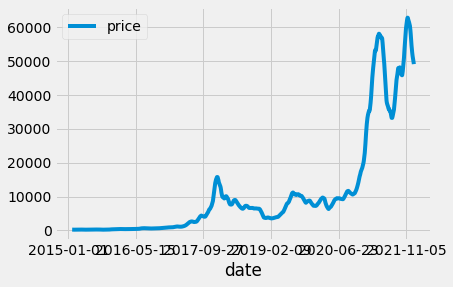

In [33]:
#smoothing graph line by by averaging 30 daays of daily data
prices.rolling(30).mean().plot()

<h4>MORE STYLING</h4>

<AxesSubplot:xlabel='date'>

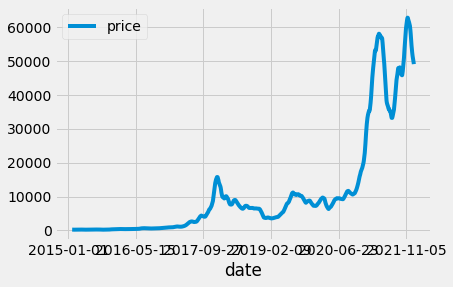

In [14]:
#using matplotlib for more styling
import matplotlib.style as style

style.use('fivethirtyeight')
rolling = prices.rolling(30).mean()
rolling.plot()

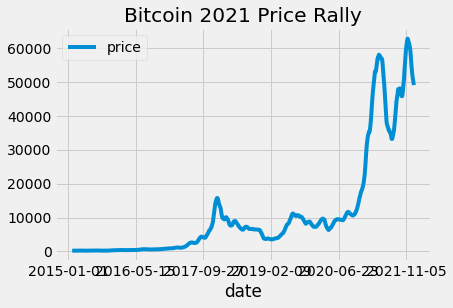

In [24]:
#EVEN MORE STYLING
import matplotlib.pyplot as plt

ax = rolling.plot()

#adding a graph title
plt.title ("Bitcoin 2021 Price Rally")
plt.show()



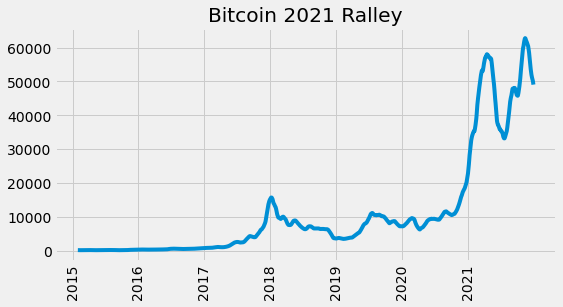

In [16]:
#improving the look of date lables on x axis
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(rolling.index.values, rolling["price"], linewidth=4)

ticks = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]

plt.title ("Bitcoin 2021 Ralley")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)

plt.show()

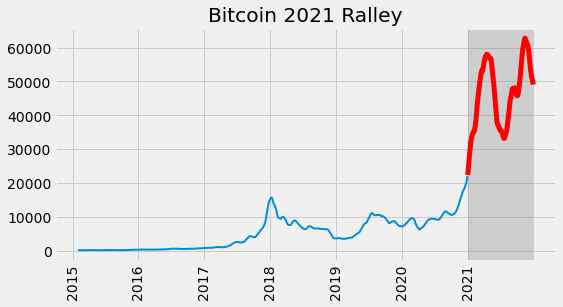

In [27]:
#hilighting the year 2021 data
pre_21 = rolling.loc [:"2020-21-31"]
post_21 = rolling.loc ["2021-01-01":]
                       
fig, ax = plt.subplots(figsize=(8,4))



ax.plot(pre_21.index.values, pre_21["price"], linewidth=2) 

ax.plot(post_21.index.values, post_21["price"], linewidth=5, color="red")

ax.axvspan (xmin = 2192, xmax=365+2192, ymin=0, alpha=0.3, color='grey')

plt.title ("Bitcoin 2021 Ralley")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)

plt.show()